In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading

df = pd.read_csv("ScimagoJR-2024-CS-conf.csv", sep=';')
df_fem = pd.DataFrame({'cs-conf': df['%Female']})

df = pd.read_csv("ScimagoJR-2024-CS-jour.csv", sep=';')
df_fem['cs-jour'] = df['%Female']

df = pd.read_csv("ScimagoJR-2024-SE-conf.csv", sep=';')
df_fem['se-conf'] = df['%Female']

df = pd.read_csv("ScimagoJR-2024-SE-jour.csv", sep=';')
df_fem['se-jour'] = df['%Female']

for col in df_fem.columns:
    df_fem[col] = (df_fem[col].astype(str).str.replace(',', '.', regex=False).astype(float))

df_fem.head()

,cs-conf,cs-jour,se-conf,se-jour
0,25.18,25.00,25.18,25.00
1,0.00,35.60,0.00,27.87
2,14.76,33.33,14.76,29.23
3,20.07,24.81,20.07,29.47
4,21.82,31.92,23.27,27.12


In [3]:
df_fem.describe().T

,count,mean,std,min,25%,50%,75%,max
cs-conf,359.0,19.092368,14.639852,0.0,0.0000,21.010,28.4350,66.00
cs-jour,359.0,30.405153,9.308253,0.0,24.8650,28.840,34.9950,62.42
se-conf,124.0,18.667339,12.721121,0.0,6.3225,20.975,26.7725,51.93
se-jour,359.0,27.027994,8.474244,0.0,22.6550,27.270,32.2250,54.55


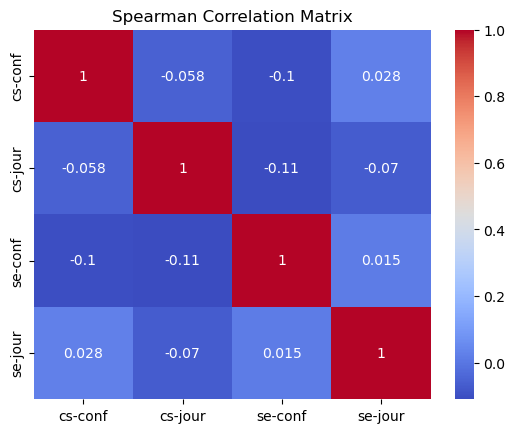

In [4]:
corr_matrix = df_fem.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

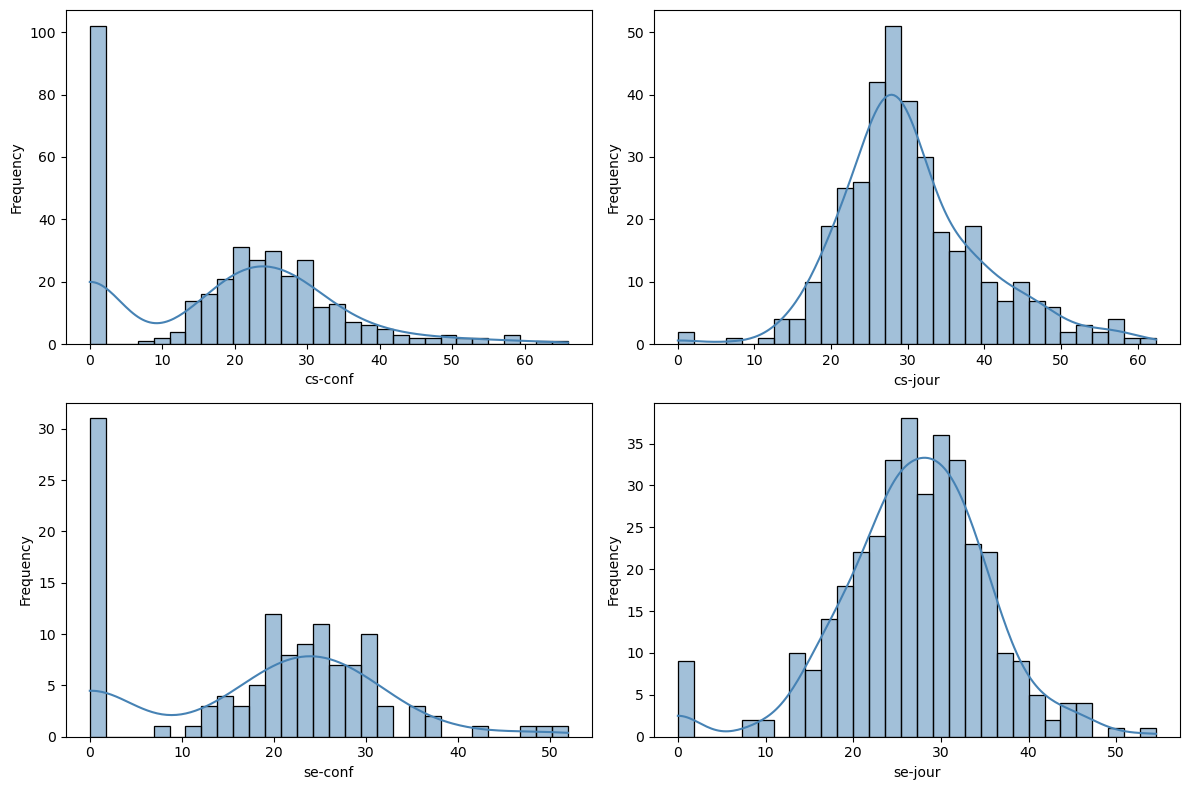

In [5]:
cols = df_fem.columns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(data=df_fem, x=col, bins=30, kde=True, ax=ax, color='steelblue')
    # ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()